#**CSIE5732 Computer Vision, NTU, TPE**
[Homework6](http://cv2.csie.ntu.edu.tw/CV/hw2019/hw6.html)


>Deadline : 2022-11-08

> Hello TA, the colab file can be found in the [URL](https://colab.research.google.com/drive/1PzUVJZ5UyGKX0YrFm1v_U8ELioM6aMLs?usp=sharing)





##Description:
###Write a program which counts the Yokoi connectivity number on a downsampled image(lena.bmp).

###Announcement
*   Downsampling Lena from 512x512 to 64x64:
  Binarize the benchmark image lena as in HW2, then using 8x8 blocks as a unit, take the topmost-left pixel as the downsampled data.
*   Count the Yokoi connectivity number on a downsampled lena using 4-connected.
*   Result of this assignment is a 64x64 matrix.
*   You can use any programing language to implement homework, however, you'll get zero point if you just call existing library.


###**FAQ**
*   Q1: 有規定報告的頁數嗎?
>沒有，但建議不要超過4頁。報告內容簡短扼要即可。
*   Q2: 請問之前作業實作過的函式，以後作業可以直接 call 現成函式嗎?
>可以哦，如果是之前作業手刻過的函式，之後用到可以任意 call function.
*   Q3: 請問報告中應該包含多少張圖?
>一張圖，請將Yokoi connectivity number的matrix用一張圖表示。
可以參照HW6封面哦。
*   Q4: 請問 Yokoi 的 label 0 要不要標示出來呢?
>都可以哦，封面為不標的結果。
*   Q5: 請問 matrix 是要把陣列內容印到一張圖上去，還是把內容 print 出來再截圖?
>Print 出再截圖就可以囉。


##Step1: Load the Dependencies

> This section loads some required libraries used in this notebook: **numpy**, **cv2**

*   [Numpy](https://www.numpy.org/) is an array manipulation library, used for linear algebra, Fourier transform, and random number capabilities.
*   [CV2](https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_gui/py_image_display/py_image_display.html) is a library for computer vision tasks.






In [ ]:
import numpy as np
from past.builtins import xrange
import cv2
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow # for image display
MAX_PIXEL_VALUE = 255

##Step2: define the class for the morphological transformations

In [ ]:
class HW6:
    def __init__(self, dirc, objc):
        self.img    = cv2.imread(dirc+objc,0)
        self.dirc    = dirc
        self.shape  = self.img.shape
        self.nRow  = self.img.shape[0]
        self.nCol   = self.img.shape[1]
    def original(self):
        return self.img
    def binarize(self, thresh, maxval):
        binarizedImg = np.zeros(self.shape, dtype=np.int)
        for rowIdx in range(self.nRow):
            for colIdx in range(self.nCol):
                binarizedImg[rowIdx, colIdx] = maxval if self.img[ rowIdx, colIdx ] > thresh else 0
        return binarizedImg
    def positionWithInBoundary(self,x,y):
        return x > -1 and x < self.nRow and y > -1 and y < self.nCol
    # Yokoi Connectivity Number for 4-connectivity
    def h(self,b, c, d, e):
        if b == c and (d != b or e != b):
            return 'q'
        if b == c and (d == b and e == b):
            return 'r'
        return 's'
    def f(self,b,c,d,e):
        if b == 'r' and c == 'r' and d == 'r' and e == 'r':
            return 5
        else:
            ans = 0
            for element in [b, c, d, e]:
                if element == 'q':
                    ans += 1
            return ans
    def temp(self, img):
        idx2position = {7:(-1,-1),2:(-1,0),6:(-1,1),3:(0,-1), 0:(0,0),1:(0,1),8:(1,-1), 4:(1,0),5:(1,1)}
        for rowIdx in range( img.shape[0] ):
            for colIdx in range( img.shape[1] ):
                if img[rowIdx][colIdx] == 0:
                    print(" ",end ="")
                else:
                    x = [0] * 9
                    idxSet = set(i for i in range(9) )
                    if rowIdx == 0:
                        idxSet -= {7,2,6}
                    if rowIdx == img.shape[0]-1:
                        idxSet -= {8,4,5}
                    if colIdx == 0:
                        idxSet -= {7,3,8}
                    if colIdx == img.shape[1]-1:
                        idxSet -= {6,1,5}
                    for idx in idxSet:
                        dr, dc = idx2position[idx]
                        x[idx] = img[rowIdx+dr][colIdx+dc]
                    a1 = self.h(x[0], x[1], x[6], x[2])
                    a2 = self.h(x[0], x[2], x[7], x[3])
                    a3 = self.h(x[0], x[3], x[8], x[4])
                    a4 = self.h(x[0], x[4], x[5], x[1])
                    print( str(self.f(a1,a2,a3,a4)),end ="")
                if colIdx == img.shape[1]-1:
                    print()

##Step3 Initiate an object from the class constructor

In [ ]:
dir_ = '/content/'
img2 = 'lena.bmp'
obj2 = HW６(dir_,img2)

##Step4: Carry out the transformations

### 4-1 the orignal image
    

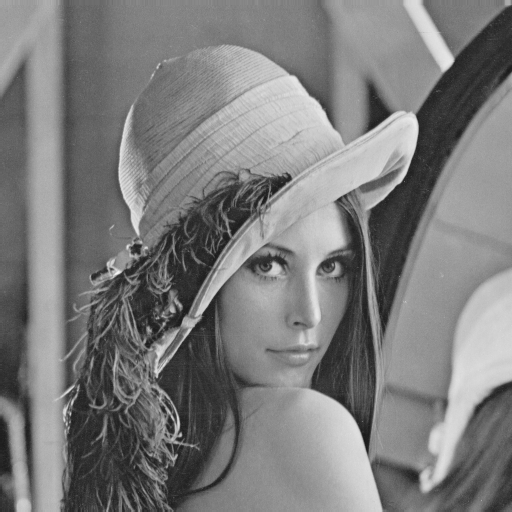

In [ ]:
cv2_imshow(obj2.original())

### 4-2 Binarize the benchmark image lena as in HW2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  # This is added back by InteractiveShellApp.init_path()


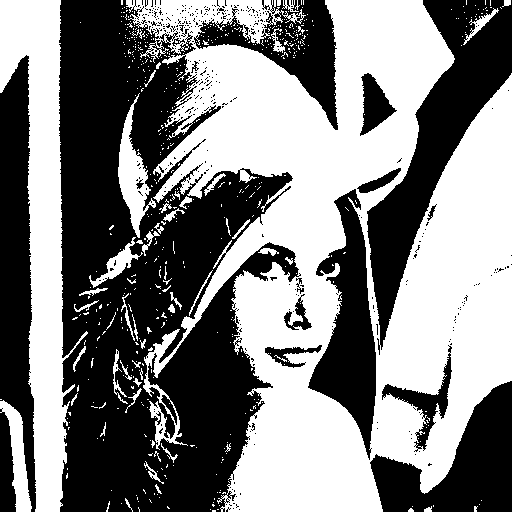

In [ ]:
binarizedImg = obj2.binarize(128,MAX_PIXEL_VALUE)
cv2_imshow( binarizedImg )

### 4-3 Downsampling Lena from 512x512 to 64x64
use 8x8 blocks as a unit, take the topmost-left pixel as the downsampled data.

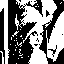

In [ ]:
downsampledImg = np.zeros( (64,64), int )
scale = obj2.shape[0] // downsampledImg.shape[0]

for rowIdx in range(downsampledImg.shape[0]):
    for colIdx in range(downsampledImg.shape[1]):
        downsampledImg[rowIdx][colIdx] = binarizedImg[rowIdx*scale][colIdx*scale]

cv2_imshow( downsampledImg )

In [ ]:
obj2.temp(downsampledImg)

11111111        121  111111122322221     111111111111          0
15555551         121 15555511 2 11  1    1155555555511          
15555551        1 2221555112  2111222     155555555551       0  
15555551        1 2 155112 1  11511       1555555555511     0   
15555551          1 2112 1     121   0    15555555555511        
15555551            1  21 1     1         11555555555551        
15555551           1  1  121111    11 0    15555555555511       
15111551           1 12 1255551111        115555555555551       
111 1551            0  0 1555555511       155555555555511       
11  1551                 21155555511      15511155555511        
21  1551                 2 15555555111    1551 11555511         
1   1551                 2 155555555511   1551  115551         1
    1551               1121155555555551   1551   15511        12
    1551               15111555555555511  1151   1111        111
    1551        1     2221 15555555555511  151    11        1151
    1551        2    12 1

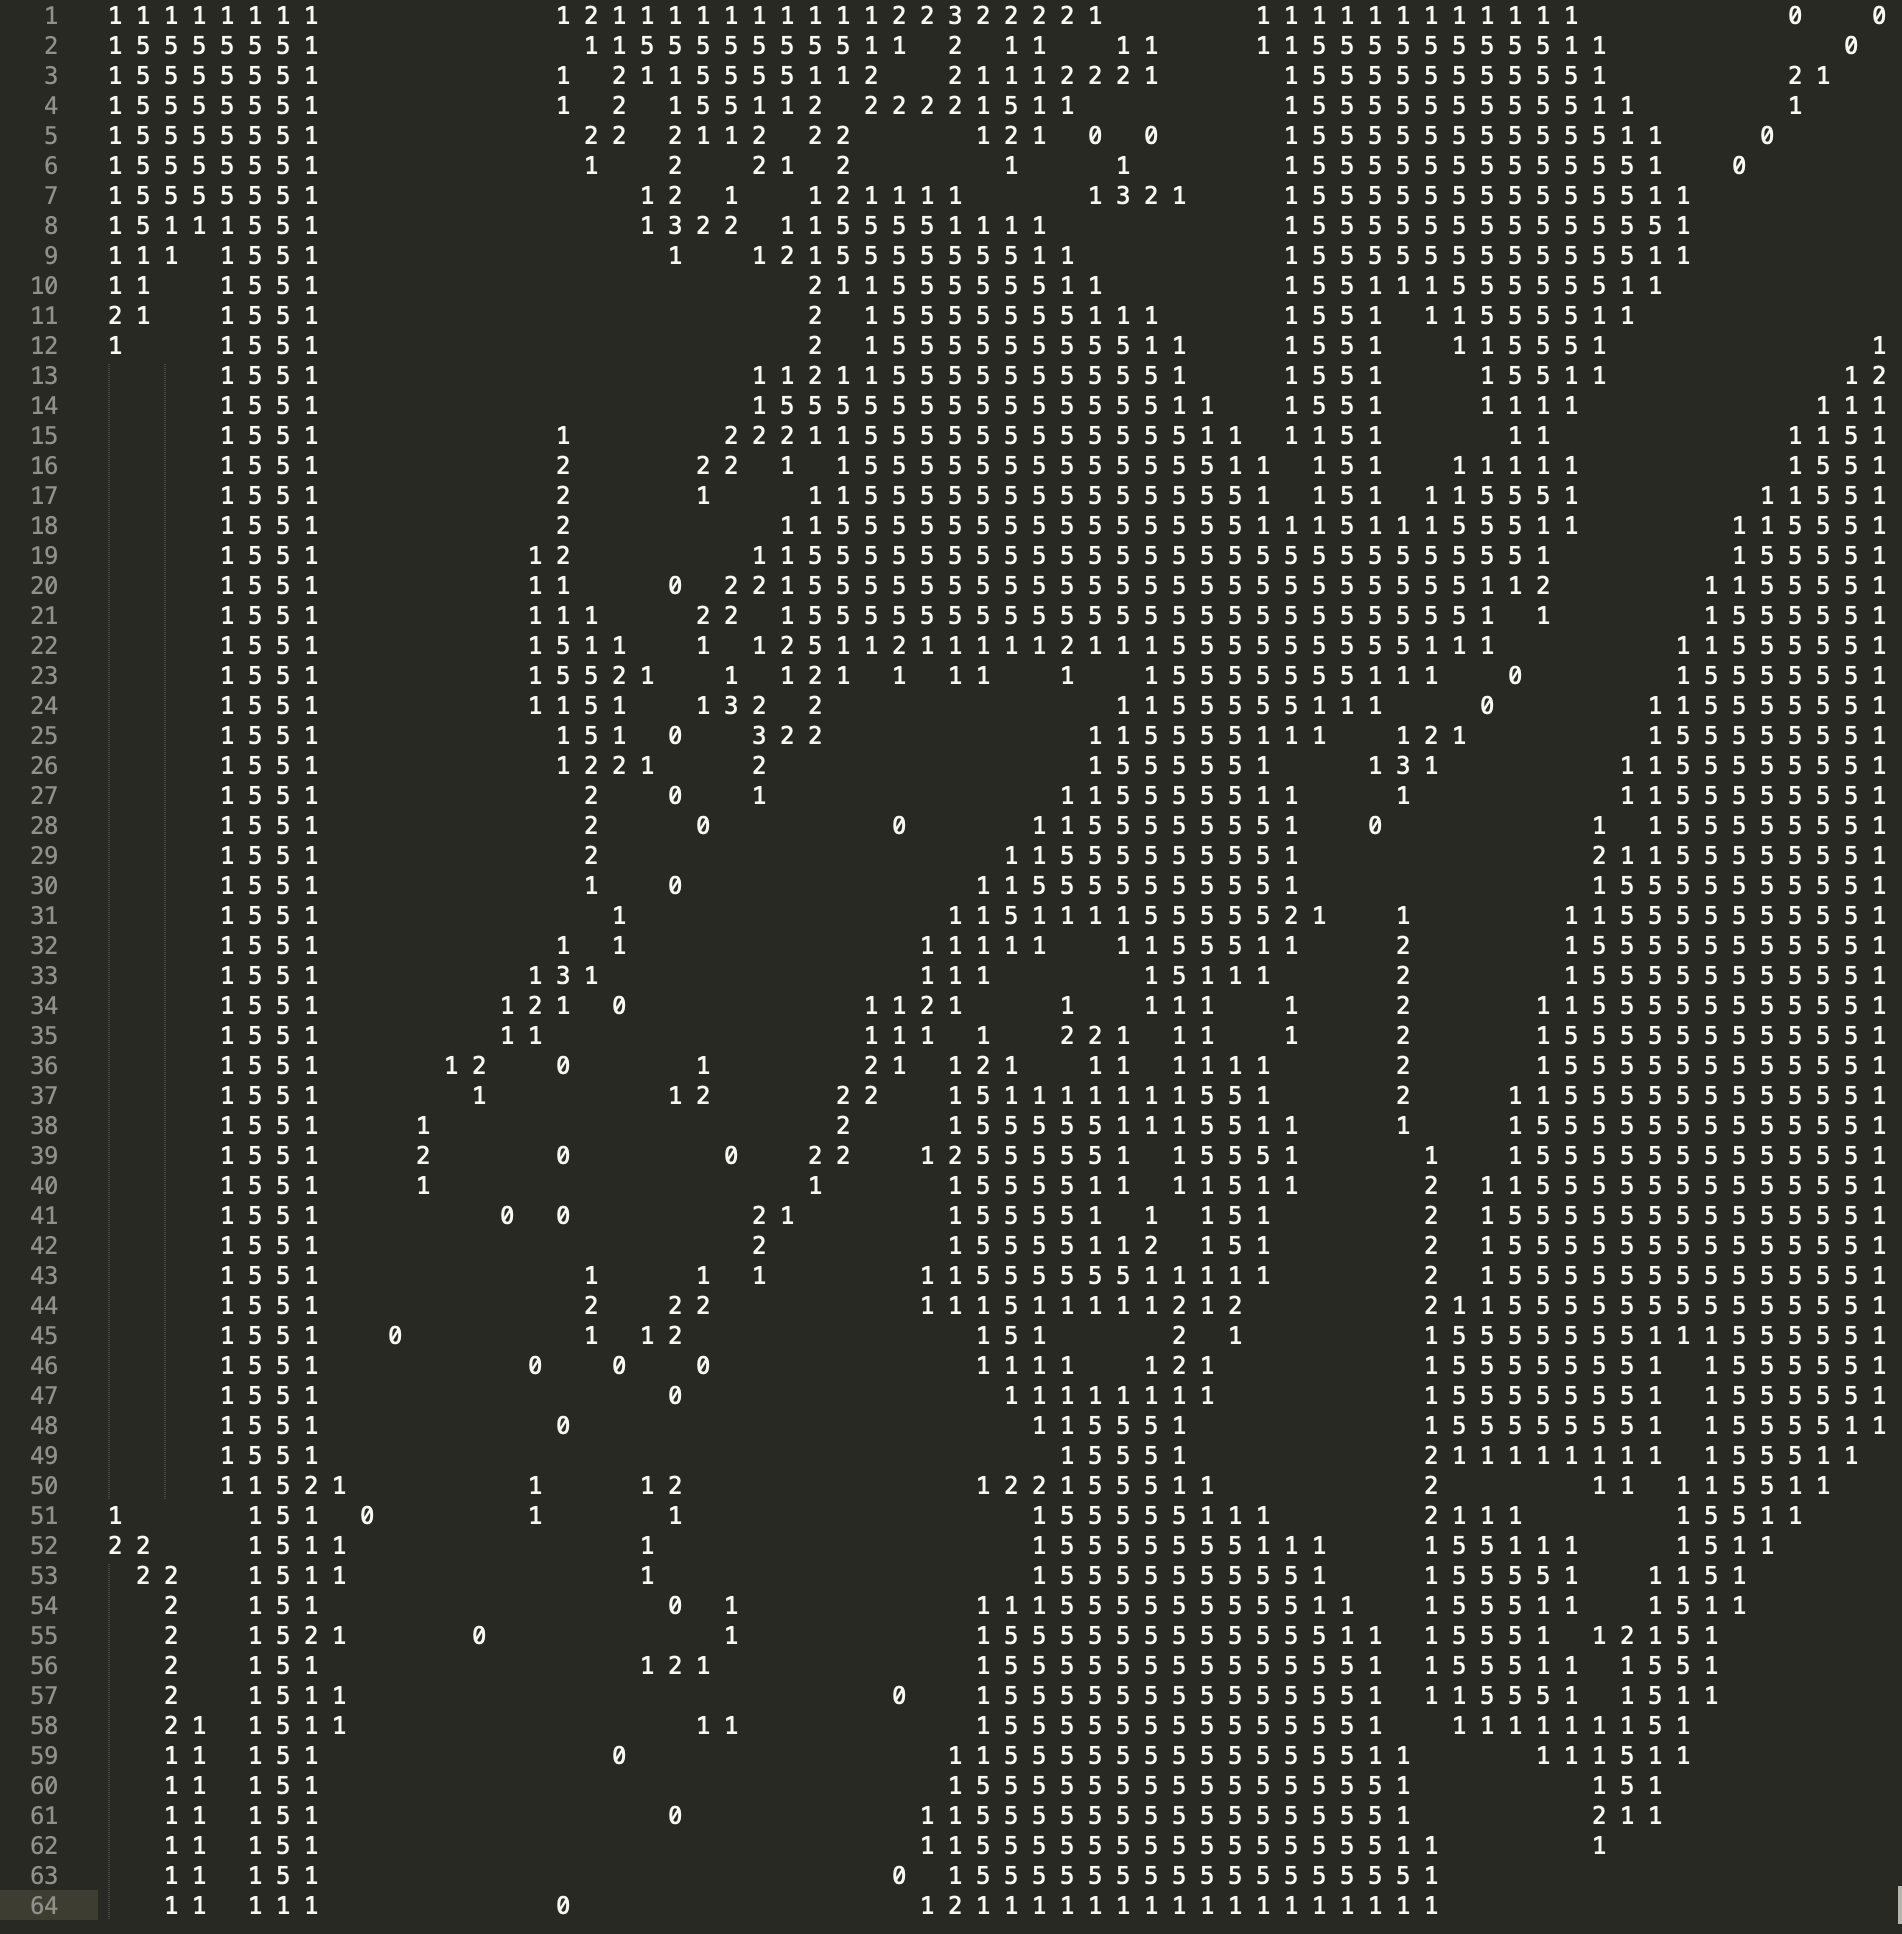